# TIME SERIES IN LSTM
 ### ILLUSTRATION WITH SINE AND COS FUNCTIONS

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [3]:
# import Data 

n_observations = np.linspace(1,8000,80000)

Feature =np.sin(n_observations)
Target =np.cos(n_observations)


In [4]:
# Change to root to save tensorboard data
%cd /

/


In [5]:
logs_path = '/Users/Seychelles/Desktop/GoogleTensorflow/finals/tensorboardData/Sinewave_First/'

In [6]:
Feature[1:5]

array([ 0.89120226,  0.93203093,  0.96354916,  0.98544208])

###  VISUALISATIONS

<p> The plot of feature set against  Target variables  is  shown below. As we can observe there is no linear relationship between the input and the output. Our task would be to use LSTM to learn the Target Variable given the feature set. But here we will do the learning using RNN (LSTM)</p>

<b>GENERATE PANDA FRAMES VISUALIZATION USING SEABORN </b>
<p>Panda and seaborn are libraries we already imported.</p>

In [7]:
# Create a Datafremae
df = pd.DataFrame({'Feature':Feature, 'Target':Target})


# VISUALISATION FOR TIME SERIES 

In [17]:
# Because we are dealing with time series it is useful if we do correlation and autocorrelation plot

In [18]:
#Do this to rescale your datset. That is divide by the max in the column
# I created a copy of data frame so you can view it
#df_copy =df.copy()
#df_copy['Feature'] = df_copy['Feature'] / max(df_copy['Feature'])
#df_copy['Target'] = df_copy['Target'] / max(df_copy['Target'])

# Generate Training , validation set

In [8]:
split_ratio = 4000; # split ratio for data set

In [9]:
# Training set
x_train = Feature[split_ratio:]
y_train = Feature[split_ratio:]

# Validation set
x_val = Feature[:split_ratio]
y_val = Feature[:split_ratio]

In [10]:
x_train.shape

(76000,)

In [11]:
y_train.shape

(76000,)

In [12]:
x_val.shape

(4000,)

In [13]:
y_val.shape

(4000,)

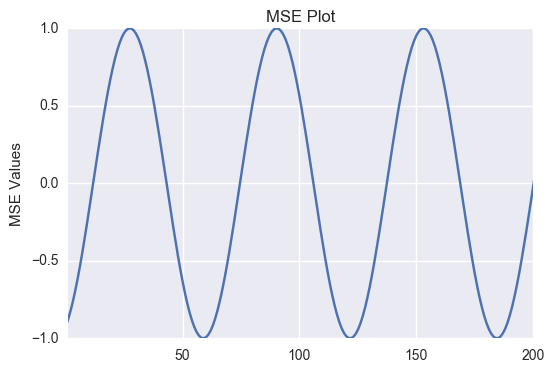

In [25]:
plt.plot(x_train)
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.xlim(1,200)
plt.show()



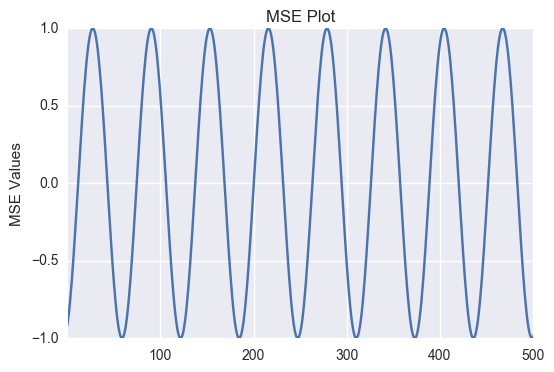

In [26]:
plt.plot(y_train)
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.xlim(1,500)
plt.show()


###  Process Input for LSTM 

In [14]:
def data_list_generator(data,list_array_size):
    """
    Input:
     (1) data 
           type : array
     (2) list_array_size
           type : integer
           
    Output: list
           Take the data and reshape it into  subarray
           elements in a list. The subarray elements are of size list_array_size.
           Each subarray element contains last list_array_size-k elements from the preceding subarray.
           We illustrate this with simple example.
          
           Subrray Elements with size less than list_array_size are dorpped. Hence the need 
           for the if condition.
           
           
    
    """
    list_store=[];
    for k in range(data.size):
        y = data[k:k+list_array_size]
        #print(y) #uncomment to see y output
        if y.size==list_array_size:
            list_store.append(y)
    return list_store;    
    
    
    


<b>We apply this fuction to generate a list for x_train, y_train, x_val and y_val</b>
<p> We have partitioned the cells the way to enable the LSTM cells to learn from preceding x values</p>

In [15]:
list_array_sizeX=200; # input window sise
list_array_sizeY=500;  # Out put window size. Predict the next 300 values of input
x_train_list = data_list_generator(x_train,list_array_sizeX)
y_train_list = data_list_generator(y_train,list_array_sizeY)
x_val_list = data_list_generator(x_val,list_array_sizeX) # validation set for input
y_val_list = data_list_generator(y_val,list_array_sizeY)  # validation set for output

###  Adjust Input and Target 
We adjust input and target so that they have the same length. Inparticular because the target(y) has longer window size It has shorter length than the input x. We delete the values of x that exceeds y's length

In [16]:
len(x_train_list)

75801

In [21]:
x_train_list[1].shape

(200,)

In [22]:
len(y_train_list)

75501

In [23]:
del x_train_list[len(y_train_list):]# delete all input (x) values greater than output length

In [24]:
len(x_train_list)# input now has same length as output

75501

In [25]:
len(x_val_list)# validation set

3801

In [26]:
len(y_val_list)

3501

In [27]:
del x_val_list[len(y_val_list): ]# To make the data length same we delete the list portion where x exceeds y

In [28]:
len(x_val_list)

3501

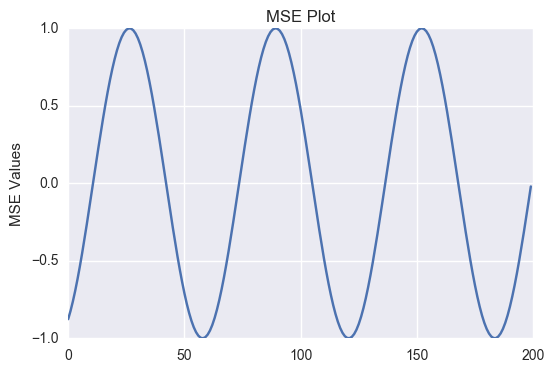

In [37]:
#Simple plot and visualisation for input x
plt.plot(x_train_list[1])
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.show()



<b> We convert the list back to array so that it can be used in tensorflow session </b>

In [29]:
x_train_model = np.array(x_train_list,dtype=np.float32).reshape(len(x_train_list),list_array_sizeX)
y_train_model=np.array(y_train_list,dtype=np.float32).reshape(len(y_train_list),list_array_sizeY)
x_val_model= np.array(x_val_list,dtype=np.float32).reshape(len(x_val_list),list_array_sizeX)
y_val_model = np.array(y_val_list,dtype=np.float32).reshape(len(y_val_list),list_array_sizeY)

In [33]:
x_train_list[0].shape

(200,)

In [32]:
x_train_model.shape

(75501, 200)

In [30]:
y_val_model.shape

(3501, 500)

In [40]:
y_train_model.shape

(75501, 500)

In [41]:
# View size and sample output
x_train_list[8];

In [42]:
#Observe 1st and 2nd samples

In [43]:
x_train_list[0];

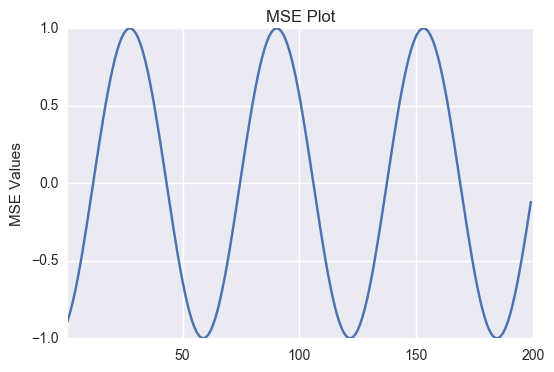

In [44]:
plt.plot(x_train_model[:1].reshape(200,1)) # simple plot for input variable
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.xlim(1,200)
plt.show()


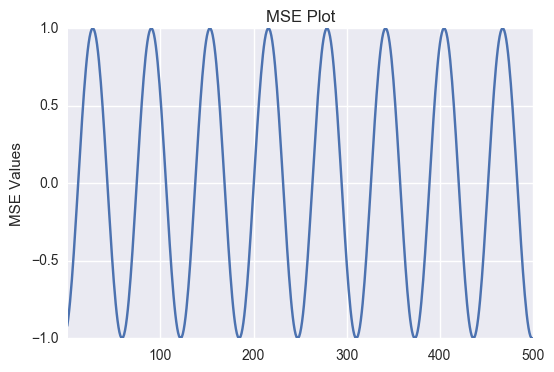

In [45]:
plt.plot(y_train_model[:1].reshape(500,1)) # simple plots for target variable
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.xlim(1,500)
plt.show()


In [46]:
x_train_model.shape

(75501, 200)

In [47]:
y_train_model.shape

(75501, 500)

In [48]:
y_train_model[1][1:2]

array([-0.82425362], dtype=float32)

# Build A Model

In [49]:
# I chose these arbitrarily
num_hidden = 128; # number of hidden units

In [50]:
with tf.name_scope("input_Output_Placeholders"):    
    #list_array_size =4;
    num_hidden = 128; 
    data_placeholder = tf.placeholder(tf.float32, [1,list_array_sizeX],name ="input")
    target_placeholder = tf.placeholder(tf.float32, [1,list_array_sizeY], name = "target")

In [52]:
with tf.name_scope("LSTM_Model"):
    lstm_layer1 = rnn_cell.LSTMCell(num_hidden,state_is_tuple=False)
    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name = "initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(data_placeholder, lstm_state1)
    #The LSTM state will get updated
    lstm_update_op1 = lstm_state1.assign(lstm_state_output1)

In [53]:
lstm_output1.get_shape()# shape of lstm output

TensorShape([Dimension(1), Dimension(128)])

### Weghts , Biases and Linear Regression Prediction

In [54]:
with tf.name_scope("weight_Bias_scope"):
# Define weights and biases then use linear regression for 
    output_W1 = tf.Variable(tf.truncated_normal([num_hidden,int(target_placeholder.get_shape()[1])]),name = "weight")
    output_b1 = tf.Variable(tf.zeros([int(target_placeholder.get_shape()[1])]), name = "bias")
#Compute the output
with tf.name_scope("prediction"):
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [55]:
final_output.get_shape()# confirm shape of final output

TensorShape([Dimension(1), Dimension(500)])

In [56]:
output_W1.get_shape() # confirm shape of weight

TensorShape([Dimension(128), Dimension(500)])

### Error and optimization 

In [57]:
with tf.name_scope("error"):
    error = tf.reduce_sum(tf.pow(tf.sub(final_output, target_placeholder), 2)) # Mean Square error

In [62]:
with tf.name_scope('optimizer'):
    train_step = tf.train.AdamOptimizer(0.0006).minimize(error) # Optimization  using Adam optimizer

In [63]:
# Create a summary to monitor cost tensor
a=tf.summary.scalar("errors_Summary", error)
# Create a summary to monitor accuracy tensor
b=tf.summary.tensor_summary("predictions_Summmary", output_W1)
# Merge all summaries into a single op
c=tf.summary.tensor_summary("bias", output_b1)

#histogram
#tf.histogram_summary("HistoPredict",final_output)

d=tf.histogram_summary("errors_Histogram",error)
e=tf.histogram_summary("weights_Histogram",output_W1)
f=tf.histogram_summary("biases_Histogram",output_b1)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.merge_summary([a, b, c,d,e,f])

### Define Batch Function for Training

In [64]:
epochs_completed = 0
index_in_epoch = 0
num_examples = len(x_train_model)
BATCH_SIZE = 1


def next_batch(batch_size):
    
    global x_train_model   #x_train_list
    global y_train_model
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reordered randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        x_train_model = x_train_model[perm]
        y_train_model= y_train_model[perm]
        
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return x_train_model[start:end], y_train_model[start:end]

### Initialise a session

In [65]:
##Session
sess = tf.Session()
#Initialize all Variables
sess.run(tf.initialize_all_variables())

### Model Training

In [66]:
error_collector=[]
writer = tf.train.SummaryWriter(logs_path, graph= tf.get_default_graph()) 
for i in range(100000):
    input_v, output_v  = next_batch(BATCH_SIZE) 
    #output_v=output_v.reshape(300,)
    #print(input_v.shape)
    _, _, network_output,summary = sess.run([lstm_update_op1,
                                     train_step,
                                     final_output,merged_summary_op],
                                    feed_dict = {
                                        data_placeholder: input_v,
                                        target_placeholder: output_v})
    writer.add_summary(summary,i)
    #network_output1.append(network_output)
    #error_collector.append(errors)
writer.close()    

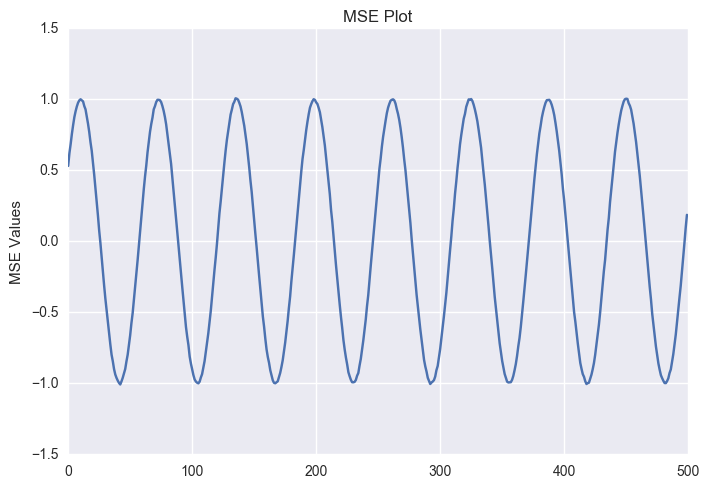

In [51]:
# View of last output during trianing
plt.plot(network_output.T)
plt.title("MSE Plot")
plt.ylabel('MSE Values')
plt.show()




In [72]:
#Flush LSTM state. Flush LSTM for validation set prediction
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));

In [73]:

epochs_completed = 0
index_in_epoch = 0
num_examples = len(x_train_model)
BATCH_SIZE = 1
# Batch for validation set
def next_batch_validation(batch_size):
    

    global index_in_epoch
    global epochs_completed
    global x_val_model
    global y_val_model
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reordered randomly    
    if index_in_epoch > num_examples:
    
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        
        x_val_model = x_val_model[perm]
        y_val_model  = y_val_model[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return x_val_model[start:end], y_val_model[start:end]

In [74]:
actual_output_val1 = []
network_output_val1 = []
x_axis =[]
for i in range(500):
    input_val, output_val  = next_batch_validation(BATCH_SIZE) 
    #print(input_val.shape)
    #print(output_val.shape)
    _, network_output_val = sess.run([lstm_update_op1,
                                  final_output],
                                 feed_dict = {
                                     data_placeholder: input_val,
                                     target_placeholder: output_val})
 
    actual_output_val1.append(output_val)
    network_output_val1.append(network_output_val)
    
    x_axis.append(i)
 


In [123]:
x_axis=np.array(x_axis)

In [126]:
x_axis.shape

(1000,)

In [127]:
network_output_val1[len(network_output_val1)-1].T.shape

(300, 1)

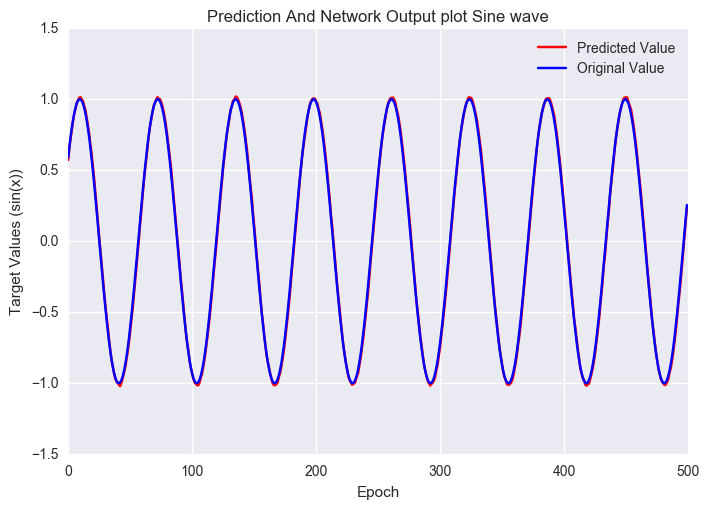

In [85]:
import matplotlib.pyplot as plt
plt.plot(x_axis,network_output_val1[len(network_output_val1)-1].T, 'r-',label="Predicted Value")
plt.plot(x_axis, actual_output_val1[len(actual_output_val1)-1].T, 'b-', label = "Original Value ")
plt.title("Prediction And Network Output plot Sine wave")
plt.ylabel("Target Values (sin(x))")
plt.xlabel("Epoch")
plt.legend()
plt.show()


In [113]:
errorsd= np.array(error_collector)

In [129]:
errorsd = errorsd.reshape(100000,1)

In [131]:
len(x_axis)

500

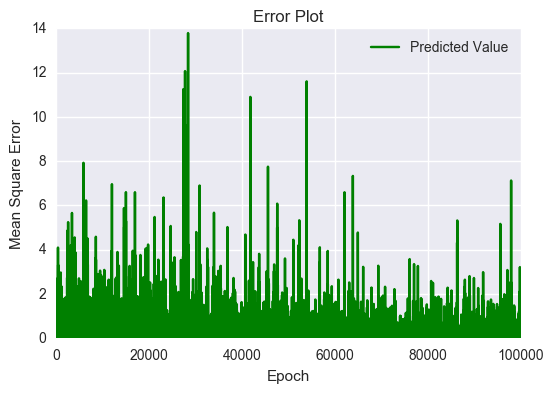

In [135]:
plt.plot(errorsd, 'g-',label="Predicted Value")
plt.title("Error Plot")
plt.ylabel("Mean Square Error")
plt.xlabel("Epoch")
plt.legend()
plt.show()